In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [33]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\archive.zip")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [34]:
data.shape

(30000, 25)

In [35]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [36]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [37]:
data.drop(['ID'],axis=1,inplace=True)

In [38]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [39]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [40]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<b>Note: </b> 1=married, 2=single, 3=0=others

In [41]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<b>Note: </b> 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown

In [42]:
data.EDUCATION = data.EDUCATION.replace({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
data.MARRIAGE = data.MARRIAGE.replace({0:3,1:1,2:2,3:3})

In [43]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [44]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [45]:
X = data.drop(['default.payment.next.month'],axis=1)
y = data["default.payment.next.month"]

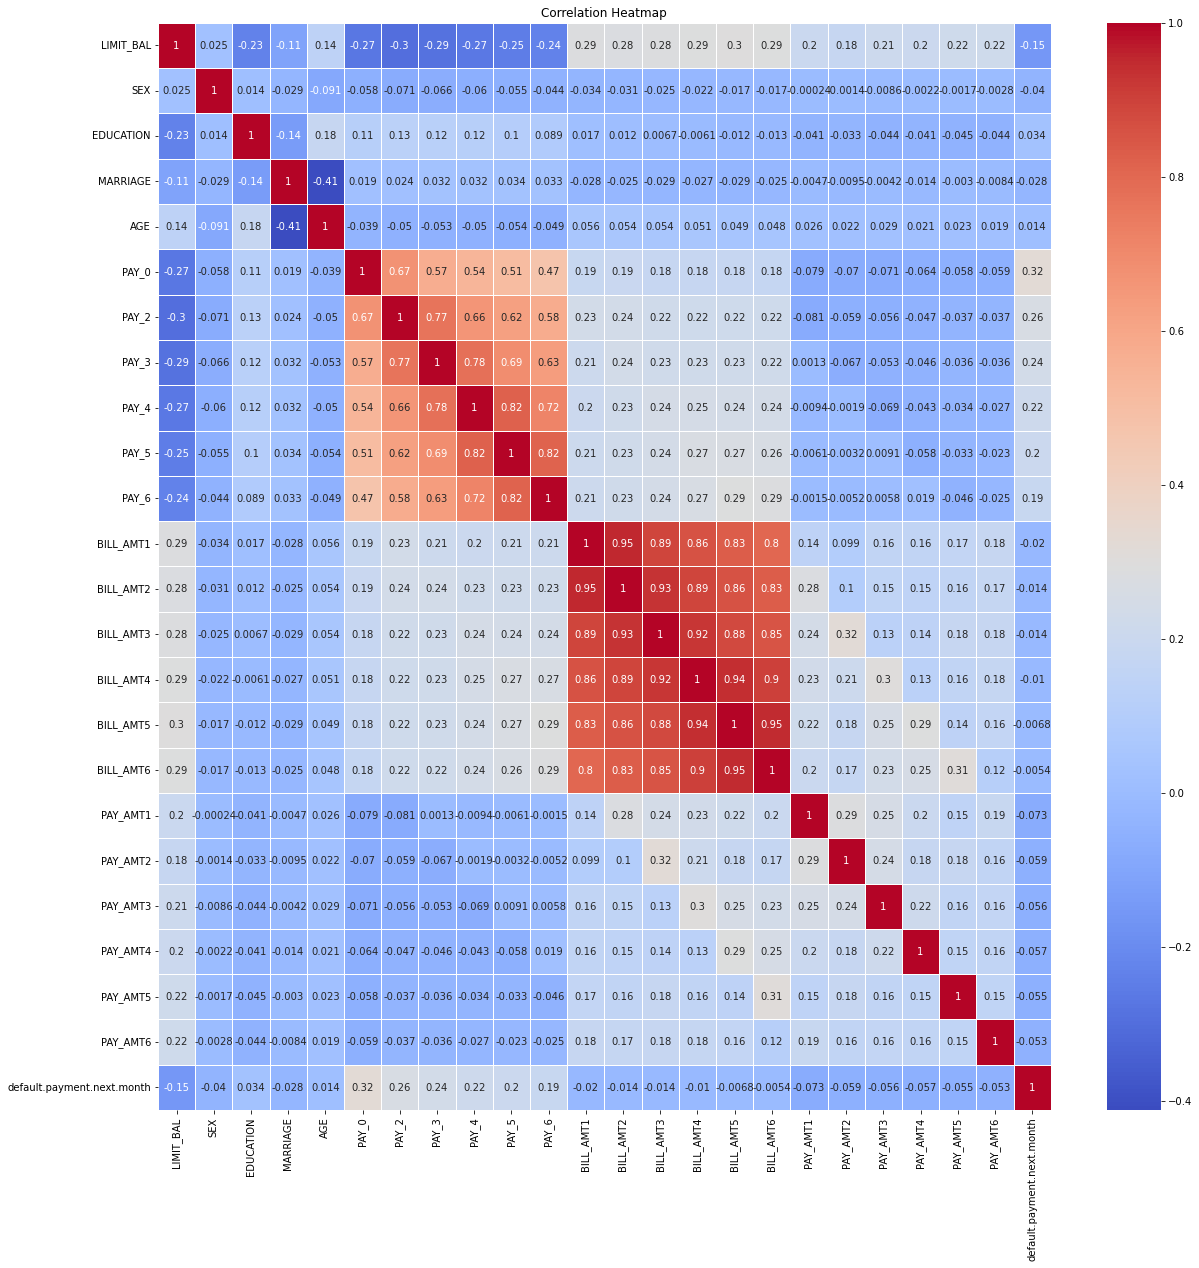

In [46]:
correlation_matrix = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Using Standardization for more robust model

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [16]:
X

array([[-1.13672015,  0.81016074,  0.21186989, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.21186989, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.55508562, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [17]:
# Base values: female, other_education, not married
data['GRAD_SCHOOL'] = (data['EDUCATION'] == 1).astype('int')
data['UNIVERSITY'] = (data['EDUCATION'] == 2).astype('int')
data['HIGH_SCHOOL'] = (data['EDUCATION'] == 3).astype('int')
data.drop('EDUCATION', axis=1, inplace=True)

data['MALE'] = (data['SEX']==1).astype('int')
data.drop('SEX',axis= 1, inplace=True)

data['MARRIED'] = (data['MARRIAGE'] == 1).astype('int')
data.drop('MARRIAGE', axis=1, inplace=True)

# For pay features if the <= 0 then it means it was not delayed
pay_features = ['PAY_0','PAY_2', 'PAY_3','PAY_4', 'PAY_5','PAY_6']
for p in pay_features:
    data.loc[data[p]<=0,p] = 0

# Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, precision_recall_curve


In [19]:
target = 'default.payment.next.month'

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [21]:
lr= LogisticRegression(n_jobs=-1,random_state=15)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [23]:
print("Accuracy: ", accuracy)
print("Recall: ", recall)


Accuracy:  0.808
Recall:  0.2426525998492841


In [24]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [25]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.812
Recall:  0.3564356435643564


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8193333333333334


In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.8193333333333334
Recall:  0.33206397562833206


In [29]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Recall: ", recall)

Accuracy:  0.7111666666666666
Recall:  0.6488956587966489


<b>CONCLUSION:</b> Support Vector Machine comes with the highest accuracy but <b>XGBOOST</b> has highest recall and in this problem statement we are looking for model with more recall because more recall implies less false negative

<b>INSIGHTS:</b> <b>PAY_0, PAY_1 ... PAY_6 was most correlated</b> with the target variable which contains status about the repayment of balance amount. -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above